CNN Classification model:

Start by importing the embedded data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
train_data = np.load('train_data.npy')
train_label= np.load('train_label.npy')

test_data = np.load('test_data.npy')
test_label = np.load('test_label.npy')

print(len(test_data))
print(len(test_label))

print(train_data.shape)
print(test_label.shape)

320
320
(1280, 784, 500)
(320, 2)


test1:
200 epoch, 30 batch,

Run1:  Conv1d 32 unit layer (3) kernel + regularization 0.008; Test score: 0.9921711087226868 Test accuracy: 0.675000011920929

Run2:  Increase amount of conv1d to 3, 9/7/5 kernel sizes with 128 filter, remove regularization, implement dropout between conv layers and max pool at 0.2, poolsize 2: stuck at val_accuracy: 0.5469

retraining up to best validation accuracy epoch :

Run3: remove dense layer at end, val_accuracy: 0.7500, loss tend to zero, next run implement regularization 

Run4: regularization l2 on conv1d, 0.008, val_accuracy: 0.5469 stuck

Run5: reduce regular to 0.001, stuck again val_accuracy: 0.5469

run6: tweaking all reg values individually starting from first layer only, stuck again 

run7: remove all the regularization, increase dropout to 0.5 between layer, Test score: 0.8016452789306641 Test accuracy: 0.768750011920929 

In [6]:
# Define the model's architecture
def build_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(128, (9),activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.MaxPooling1D((2)))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Conv1D(128, (7),activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.MaxPooling1D((2)))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Conv1D(128, (5),activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

model = build_model()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
train_data = train_data.reshape(train_data.shape[0], 784, 500)
history = model.fit(
    train_data, 
    train_label, 
    epochs = 200,
    batch_size = 30,
    validation_split=0.2,
) 

Epoch 1/200
35/35 [==============================] - 2s 44ms/step - loss: 0.7027 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 2/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5117
Epoch 3/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6970 - accuracy: 0.5156 - val_loss: 0.6937 - val_accuracy: 0.4609
Epoch 4/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6963 - accuracy: 0.5049 - val_loss: 0.6923 - val_accuracy: 0.5430
Epoch 5/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6917 - accuracy: 0.5303 - val_loss: 0.6934 - val_accuracy: 0.4844
Epoch 6/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6976 - accuracy: 0.5146 - val_loss: 0.6925 - val_accuracy: 0.4727
Epoch 7/200
35/35 [==============================] - 1s 30ms/step - loss: 0.6944 - accuracy: 0.5127 - val_loss: 0.6915 - val_accuracy: 0.5469
Epoch 

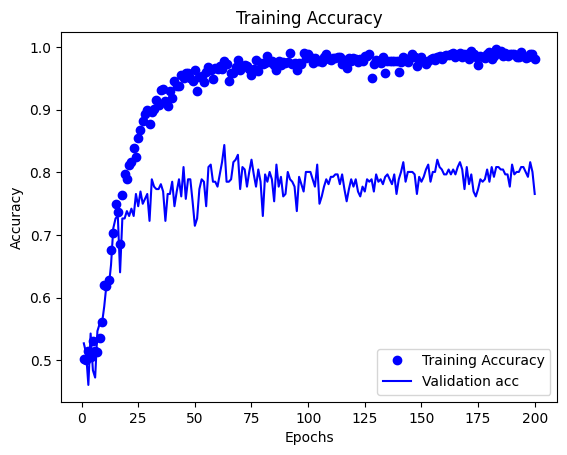

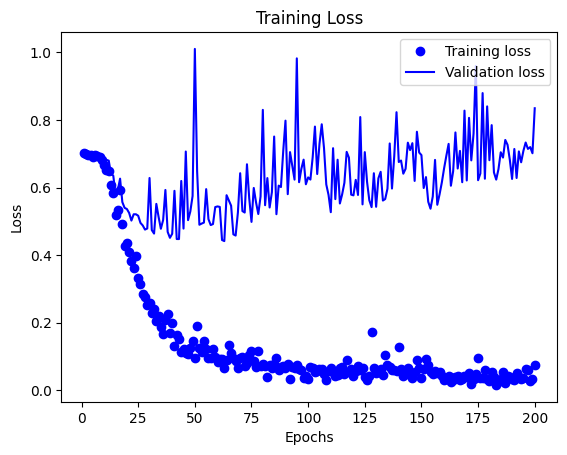

62


In [8]:
history_dict = history.history
history_dict.keys() # the data gathered during training
import matplotlib.pyplot as plt

#plot of the accuracy
def plot_acc():
    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    solid_blue_line = 'b'
    blue_dots = 'bo'

    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#plot of the loss
def plot_loss():
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(loss) + 1)
    solid_blue_line = 'b'
    blue_dots = 'bo'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_acc()
plot_loss()
early_stopping_epoch = np.argmax(history.history["val_accuracy"])
print(early_stopping_epoch)

In [9]:
model.fit(
    train_data,                     # full training set
    train_label,
    epochs=early_stopping_epoch, # the epoch where overfitting starts
    validation_split=0.2,
)
model.save('saved_model_cnn')

Epoch 1/62
32/32 [==============================] - 2s 44ms/step - loss: 0.0716 - accuracy: 0.9736 - val_loss: 0.6757 - val_accuracy: 0.7930
Epoch 2/62
32/32 [==============================] - 1s 34ms/step - loss: 0.0238 - accuracy: 0.9912 - val_loss: 0.7026 - val_accuracy: 0.7930
Epoch 3/62
32/32 [==============================] - 1s 35ms/step - loss: 0.0319 - accuracy: 0.9922 - val_loss: 0.7101 - val_accuracy: 0.8125
Epoch 4/62
32/32 [==============================] - 1s 33ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.7035 - val_accuracy: 0.8125
Epoch 5/62
32/32 [==============================] - 1s 34ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.8829 - val_accuracy: 0.7930
Epoch 6/62
32/32 [==============================] - 1s 34ms/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.7868 - val_accuracy: 0.7891
Epoch 7/62
32/32 [==============================] - 1s 33ms/step - loss: 0.0401 - accuracy: 0.9922 - val_loss: 0.8572 - val_accuracy: 0.8125
Epoch 8/62
32

INFO:tensorflow:Assets written to: saved_model_cnn\assets


INFO:tensorflow:Assets written to: saved_model_cnn\assets


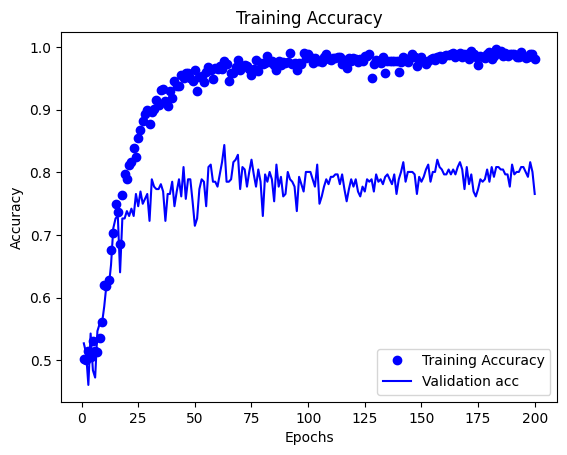

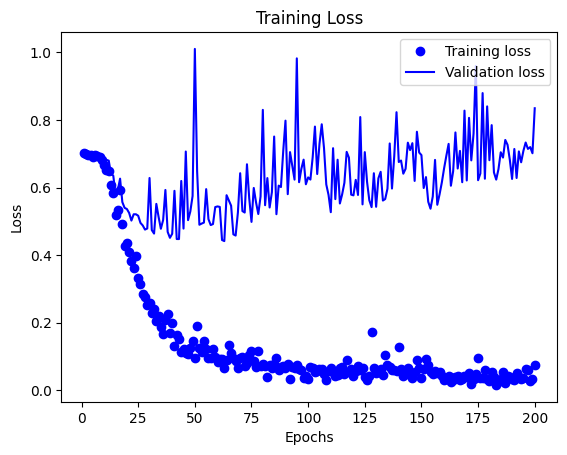

In [10]:
plot_acc()
plot_loss()

In [11]:
score, acc = model.evaluate(test_data, test_label, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 - 0s - loss: 0.8016 - accuracy: 0.7688 - 344ms/epoch - 34ms/step
Test score: 0.8016452789306641
Test accuracy: 0.768750011920929
